<a href="https://colab.research.google.com/github/julianamo93/My-First-NN-NRA/blob/main/My_First_NN_2TDSZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implementação de uma rede neural com o framework Keras**

In [59]:
import pandas as pd

# Separação de dados de treino e teste
from sklearn.model_selection import train_test_split

# Bibliotecas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Arquitetura para redes fully connected
from keras.models import Sequential
from keras.layers import Dense

In [60]:
dados = pd.read_csv('/content/darts.csv')
dados.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [61]:
dados.shape

(800, 3)

In [62]:
dados.columns

Index(['xCoord', 'yCoord', 'competitor'], dtype='object')

In [63]:
# Dados de entrada (X) e saída (y)
X = dados[['xCoord', 'yCoord']] # features do modelo
y = dados['competitor'] # target (valor a ser previsto)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.shape

(640, 2)

In [66]:
y_train.shape

(640,)

In [67]:
dados['competitor'].value_counts()

,count
competitor,
Steve,200
Susan,200
Michael,200
Kate,200


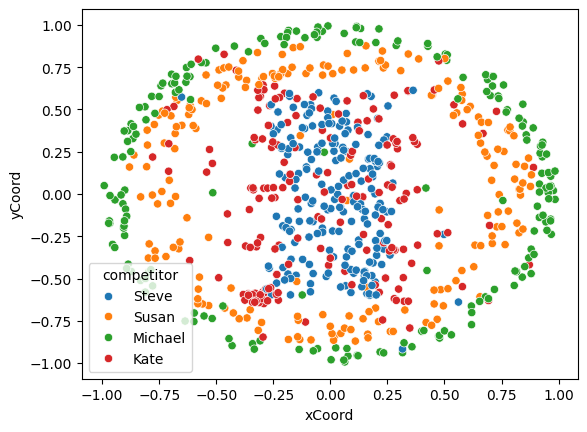

In [68]:
# Gráfico de dispersão xCoord e yCoord
sns.scatterplot(data=dados, x='xCoord', y='yCoord', hue='competitor')
plt.show()

In [69]:
# Arquitetura de Rede neural
modeloRNA = Sequential()

In [70]:
# Input layer ------> 2 neurônios (2 features)
# Hidden Layer 1 ------> 128 neurônios (escolhido arbitrariamente)
# A função de ativação "relu" é a mais utilizada para camadas ocultas
modeloRNA.add(Dense(units=128, activation='relu', input_dim=2))
# Hidden Layer 2 ------> 32 neurônios (escolhido arbitrariamente)
modeloRNA.add(Dense(units=32, activation='relu'))
# Output Layer -------> 4 neurônios (4 classes para prever)
# A função de ativação "softmax" é utilizada para a camada de saída em problemas de classificação multiclasse
# A função sigmoid é utilizada em problemas de classificação binária
modeloRNA.add(Dense(units=4, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
modeloRNA.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,644 (18.14 KB)

 Trainable params: 4,644 (18.14 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Compilando a rede
# Função de custo
# Classificação Multiclasses -----> categorical_crossentropy
# Classificação Binária ------> binary_crossentropy
# Regressão -----> mse (erro médio quadrático)
modeloRNA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
# Conersão do array y em 4 colunas booleanas
# Isso é necessário para adequar o formato dos dados de y à arquitetura da rede
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [80]:
y_train

,Kate,Michael,Steve,Susan
264,False,True,False,False
615,True,False,False,False
329,False,True,False,False
342,False,True,False,False
394,True,False,False,False
...,...,...,...,...
71,True,False,False,False
106,False,False,False,True
270,False,False,False,True
435,True,False,False,False


In [81]:
# Treinamento de rede
modeloRNA.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2553 - loss: 1.3819
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 1.3522  
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3703 - loss: 1.3022 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4679 - loss: 1.2633 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 1.2082 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 1.1438 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 1.0829 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5623 - loss: 1.0265  
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.9785  
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 0.9446 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6246 - loss: 0.9103 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [82]:
# Previsão
y_predict = modeloRNA.predict(X_test)
y_predict

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[3.25806290e-01, 3.64923821e-04, 6.62745655e-01, 1.10831345e-02],
       [2.25449167e-03, 9.50826347e-01, 1.02783879e-03, 4.58912216e-02],
       [5.70098400e-01, 2.24238698e-04, 4.23673689e-01, 6.00362057e-03],
       [2.49651641e-01, 2.45900382e-03, 7.06660688e-01, 4.12285477e-02],
       [2.44127274e-01, 6.88406290e-05, 7.54442930e-01, 1.36090838e-03],
       [3.39868218e-02, 6.26367390e-01, 2.73746118e-05, 3.39618325e-01],
       [8.14500730e-03, 8.95183861e-01, 3.46045385e-06, 9.66677740e-02],
       [1.04903500e-03, 9.74538207e-01, 6.68204084e-05, 2.43460163e-02],
       [4.22553979e-02, 5.50532222e-01, 1.14731351e-02, 3.95739257e-01],
       [3.11193033e-03, 9.10669565e-01, 7.21482365e-07, 8.62177908e-02],
       [2.73478717e-01, 1.60851181e-01, 5.06233536e-02, 5.15046775e-01],
       [6.62302300e-02, 4.50668037e-01, 9.40375176e-05, 4.83007729e-01],
       [2.73124874e-01, 6.64372668e-02, 1.71186835e-01, 4.89251018e-01],
       [3.91610190e-02, 5.89852512e-01, 1.01697740e

*   Probabilidades da Classe
*   classe 1: 0.0617
*   classe 2: 0.1695 ----> 16.95%
*   classe 3: 0.000041
*   classe 4: 0.768 -----> 76.8%

*   -- Análise de linha aleatória com a previsão das classes, calculando a porcentagem da acurácia em cada classe. O -02, -01 no final é a quantidade decimal, que determina o tamanho da classe.